## Informe 1 - Grupo 6

### Introducción
Este informe trata sobre la percepción temporal y la propagación de errores en mediciones espaciales. Se realizaron tres experimentos: dos de mediciones directas (1A y 1B) y uno de mediciones indirectas (2). El objetivo es explorar metodologías de medición, comprender sus ventajas y suposiciones, propagar incertidumbres y aplicar conceptos de precisión y exactitud.

### Resumen de Experimentos

#### Experimentos 1A y 1B: Mediciones Directas
1. **Experimento 1A:**
   - **Método:** Uso de un cronómetro para medir el tiempo entre eventos de encendido de un diodo LED.
   - **Resultados:** Se realizaron 100 mediciones. Se encontró que las mediciones se distribuyen de manera más precisa a medida que aumentan las observaciones, aproximándose a una distribución normal.
   
2. **Experimento 1B:**
   - **Método:** Uso de un cronómetro para medir el tiempo entre eventos de sonido de un buzzer.
   - **Resultados:** Similar al experimento 1A, se observaron 100 mediciones, con una mayor precisión en comparación con el experimento 1A.

#### Experimento 2: Mediciones Indirectas
- **Objetivo:** Determinar el volumen de un objeto de aluminio con forma de prisma rectangular y un orificio cilíndrico pasante.
- **Métodos:** 
  1. Volumen a partir de dimensiones métricas del objeto.
  2. Volumen basado en la masa y densidad del aluminio.
  3. Volumen desplazado por inmersión en agua.
- **Resultados:** El método de desplazamiento de agua resultó ser el más preciso para la determinación del volumen.

### Conclusiones
El estudio subraya la importancia de la elección del método de medición y la comprensión de las incertidumbres asociadas. Los experimentos directos mostraron que las mediciones con estímulos sonoros (1B) fueron más precisas que con estímulos visuales (1A). Para las mediciones indirectas, el método de desplazamiento de agua ofreció la mayor precisión, demostrando ser una técnica fiable para calcular el volumen del objeto.


In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [145]:
mediciones_visuales = [0.96, 1.63, 1.12, 1.15, 1.27, 1.02, 1.21, 1.4, 1.2, 1.3, 1.48, 1.03, 1.37, 0.92, 1.21, 1.17, 0.99, 1.33, 1.2, 1.18, 1.04, 1.37, 1.18, 1.17, 1.33, 1.16, 1.31, 1.12, 1.3, 0.97, 1.33, 1.11, 0.9, 0.86, 0.93, 0.98, 1.13, 1.28, 1.12, 1.28, 1.08, 1.13, 1.12, 0.97, 1.04, 0.91, 1.13, 1.11, 0.98, 1.25, 1.05, 1.29, 1.15, 1.08, 1.04, 1.21, 1.02, 1.27, 1.31, 1.22, 1.01, 1.09, 1.05, 0.98, 1.1, 1.05, 1.04, 0.93, 1.13, 1, 0.87, 1.08, 1.06, 1.33, 1.07, 0.95, 0.87, 1.01, 1.26, 1.01, 1.13, 0.88, 1.06, 1.14, 1.07, 0.84, 0.94, 1.21, 1.41, 1.06, 1.14, 1.06, 0.88, 1.07, 1.07, 0.88, 1.06, 0.95, 1.27, 1.08]
mediciones_sonoras = [1.06, 1.16, 1.25, 1.16, 1.25, 1.1, 1.13, 0.96, 1.13, 1.14, 1.18, 1.26, 1.24, 1.14, 1.04, 1.19, 1.16, 1.14, 1.12, 1.27, 1.13, 0.98, 1.15, 1.16, 1.17, 1.24, 1.15, 1.18, 1.05, 1.23, 1.07, 1.14, 1.21, 1.08, 1.15, 1.07, 1.21, 1.14, 1.01, 1.08, 1.15, 1.15, 1.07, 1.2, 0.94, 1.01, 1.21, 1.2, 1.13, 1.13, 1.08, 1.06, 1.2, 1.13, 1.07, 1.19, 1.13, 1.28, 1.06, 1, 1.01, 1.08, 1.14, 1.2, 1.08, 1.14, 1.26, 1.14, 1.2, 1.19, 1.11, 1.15, 1.15, 1.13, 1.12, 1.14, 1.15, 1.14, 1.21, 1.14, 1.12, 1.05, 1.15, 1.15, 1.14, 1.08, 1.12, 1.12, 1.2, 1.23, 1.13, 1.08, 1.04, 1.21, 1.16, 1.16, 1.16, 1.18, 1.2, 1.12]

In [146]:
# Reordenamiento aleatorio de las mediciones para minimizar sesgos de observadores
seed = 42
np.random.seed(seed)
np.random.shuffle(mediciones_visuales)
np.random.shuffle(mediciones_sonoras)

In [147]:
data_vis = pd.DataFrame({'tiempo': mediciones_visuales})
data_vis.head()

,tiempo
0,1.14
1,1.08
2,0.87
3,0.91
4,1.04


In [148]:
data_vis.count()

tiempo    100
dtype: int64

In [149]:
def obtener_estadisticas(data):
    media = data.mean().item()
    moda = data.mode().values.flatten()
    desviacion = data.std().item()
    N = len(data)
    errorEstandar = desviacion / np.sqrt(N)
    minimo = data.min().item()
    maximo = data.max().item()
    mediana = data.median().item()
    rango = maximo - minimo
    
    return {'media': media,
            'moda': moda,
            'desviacion': desviacion,
            'N': N,
            'errorEstandar': errorEstandar,
            'minimo': minimo,
            'maximo': maximo,
            'mediana': mediana,
            'rango': rango}


In [150]:

def graficar(data, titulo, mult = 1):
    s = obtener_estadisticas(data)

    # Ancho de los bins usando el Criterio de Scott
    bin_width = 3.49 * s["desviacion"] / np.power(s["N"], 1/3)

    # Numero de bins
    bin_count = int(mult * s["rango"] / bin_width)

    # Calcular los limites de los bins redondeando al decimal mas cercano
    bin_width = round(bin_width, 1)
    bin_start = round(data.min().item() - 0.5 * bin_width, 1)
    bin_end = round(data.max().item() + 0.5 * bin_width, 1)

    # Posiciones de cada uno de los limites de los bins
    bins = np.linspace(bin_start, bin_end, bin_count + 1)

    plt.hist(data, bins=bins, edgecolor='black', density=True)

    # Add vertical line at the mean, mediana, mode, minimo, maximo
    plt.axvline(s["media"], color='r', linestyle='solid', linewidth=2,
                label=f'media: {s["media"]:.2f}')
    for m in s["moda"]:
        plt.axvline(m, color='g', linestyle='dashdot', linewidth=2, label=f'moda: {m:.2f}')
    plt.axvline(s["mediana"], color='b', linestyle='dashed', linewidth=2, label=f'mediana: {s["mediana"]:.2f}')
    plt.axvline(s["minimo"], color='y', linestyle='dotted', linewidth=2, label=f'mínimo: {s["minimo"]:.2f}')
    plt.axvline(s["maximo"], color='y', linestyle='dotted', linewidth=2, label=f'máximo: {s["maximo"]:.2f}')

    # Agrego densidad normal
    x = np.linspace(bin_start, bin_end, 1000)
    y = (1 / (s["desviacion"] * np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.power((x - s["media"]) / s["desviacion"], 2))
    plt.plot(x, y, color='k', linewidth=1, label=f'Normal({s["media"]:.2f}, {s["desviacion"]:.2f})')

    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia relativa')
    #plt.title(titulo)
    plt.legend(fontsize='small')
    plt.show()

In [151]:
N = 20
data_vis_20 = data_vis.iloc[:N]

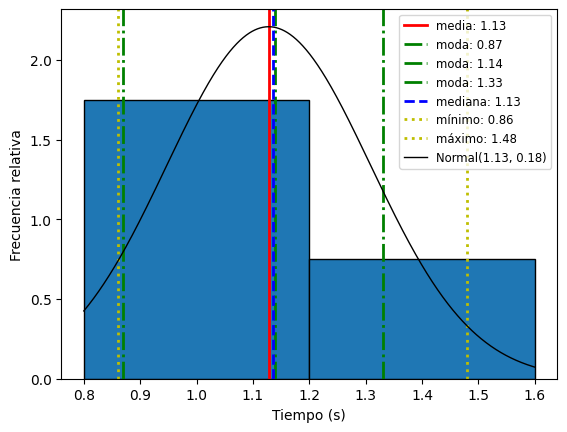

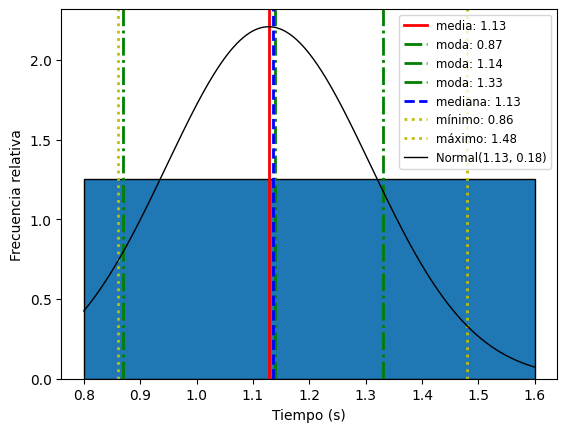

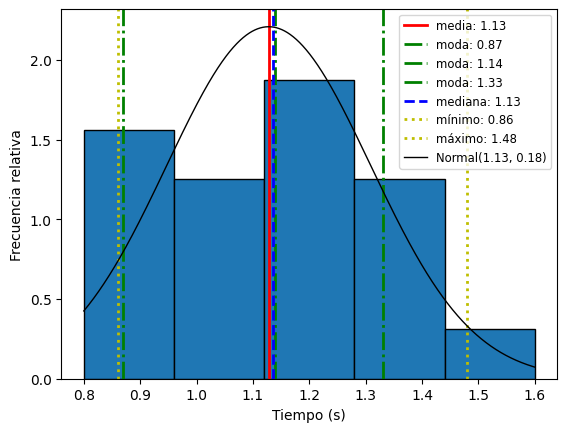

In [152]:
graficar(data_vis_20,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott')

graficar(data_vis_20,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_vis_20,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott * 2',
         mult=2)

In [153]:
N = 60
data_vis_60 = data_vis.iloc[:N]

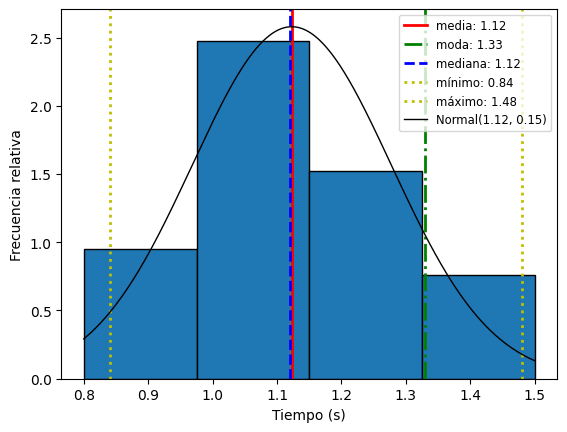

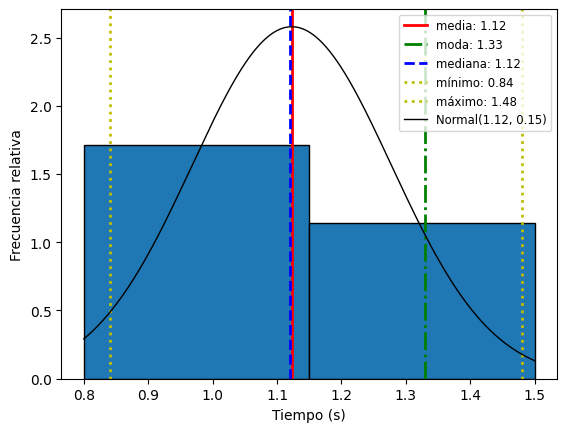

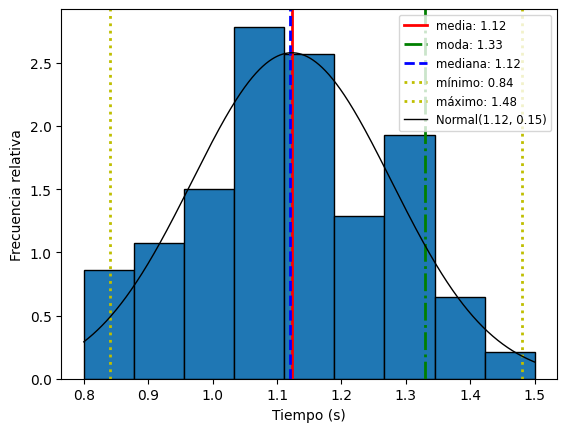

In [154]:
graficar(data_vis_60,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott')

graficar(data_vis_60,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_vis_60,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott * 2',
         mult=2)

In [155]:
N = 100
data_vis_100 = data_vis.iloc[:N]

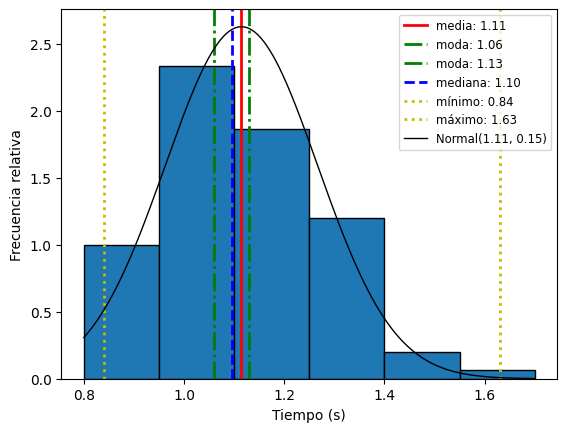

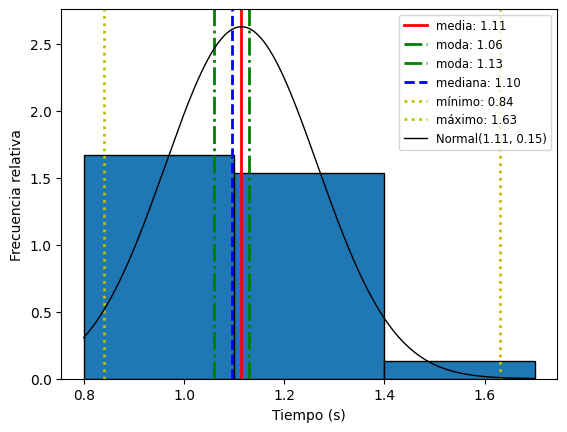

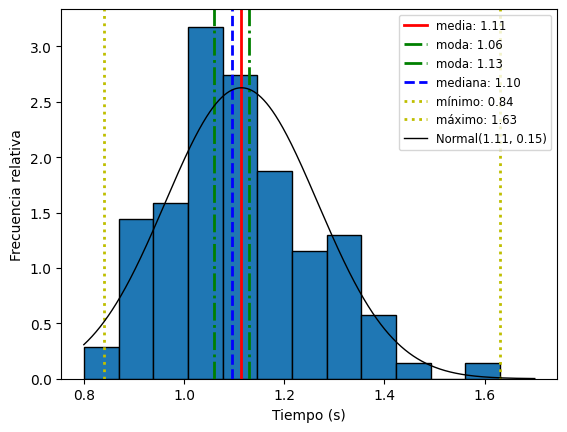

In [156]:
graficar(data_vis_100,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott')

graficar(data_vis_100,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_vis_100,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott * 2',
         mult=2)

In [157]:
stats = obtener_estadisticas(data_vis_100)
errorAbsolutoTotalVisuales = np.sqrt(0.01**2 + stats['errorEstandar']**2)

print("Error absoluto total:", errorAbsolutoTotalVisuales.round(4).item())

Error absoluto total: 0.0182


### Actividad 1B

In [158]:
data_son = pd.DataFrame({'tiempo': mediciones_sonoras})
data_son.head()

,tiempo
0,1.14
1,1.14
2,1.14
3,1.07
4,1.19


In [159]:
N = 20
data_son_20 = data_son.iloc[:N]

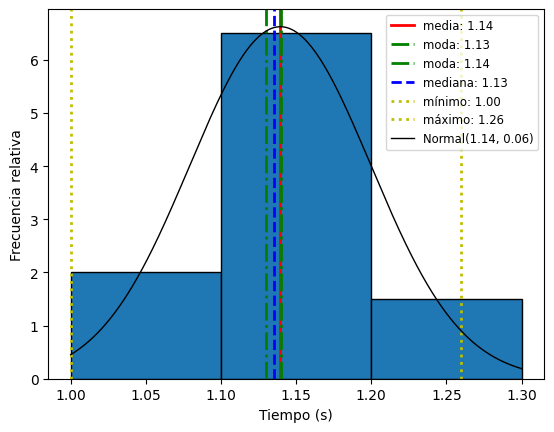

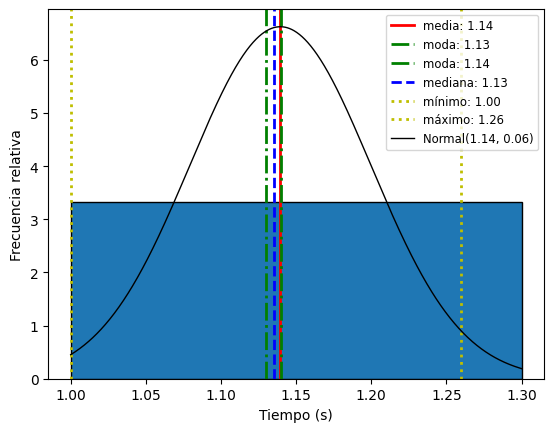

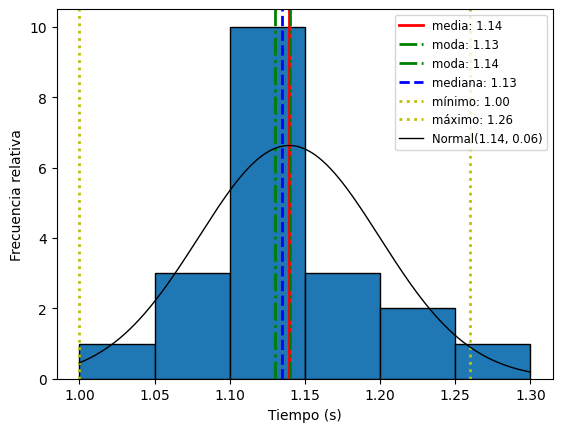

In [160]:
graficar(data_son_20,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott')

graficar(data_son_20,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_son_20,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott * 2',
         mult=2)

In [161]:
N = 60
data_son_60 = data_son.iloc[:N]

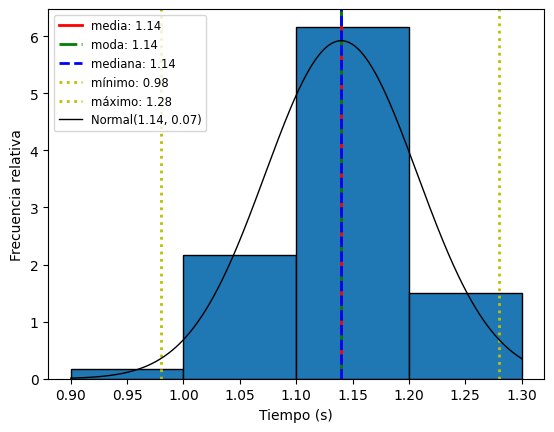

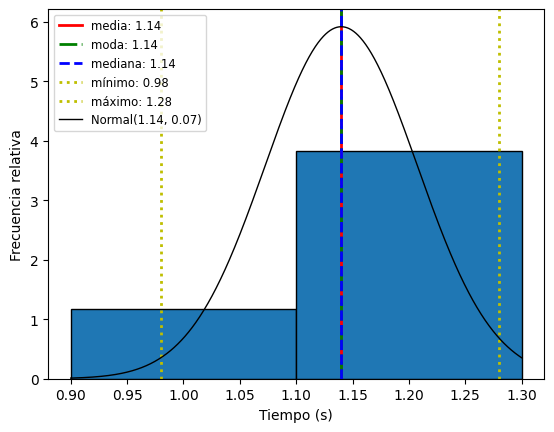

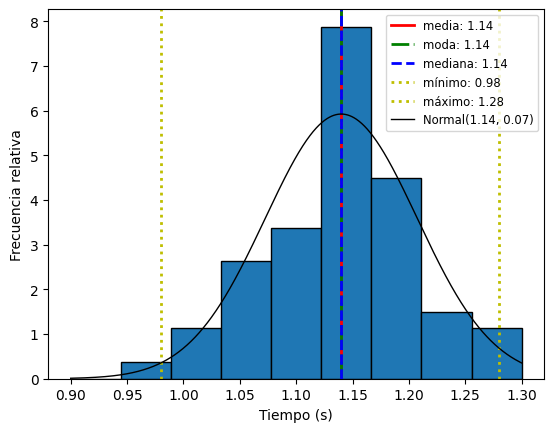

In [162]:
graficar(data_son_60,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott')

graficar(data_son_60,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_son_60,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott * 2',
         mult=2)

In [163]:
N = 100
data_son_100 = data_son.iloc[:N]

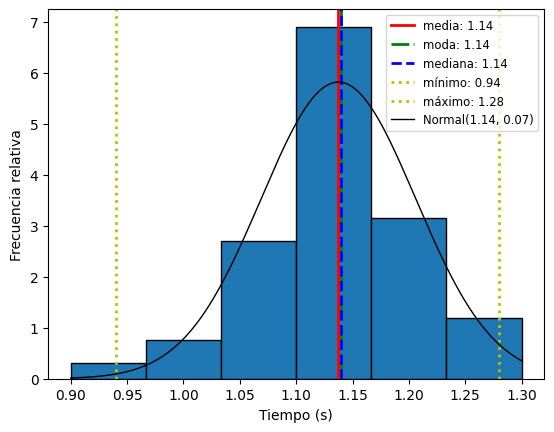

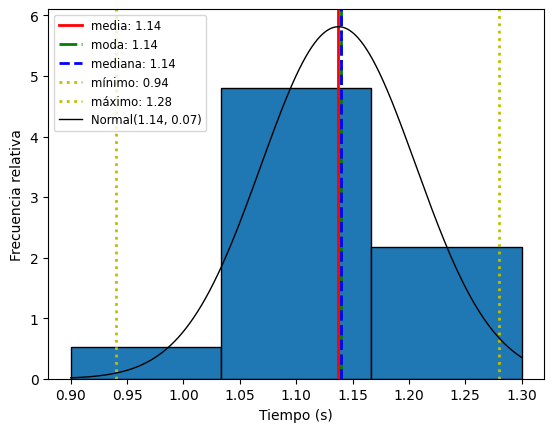

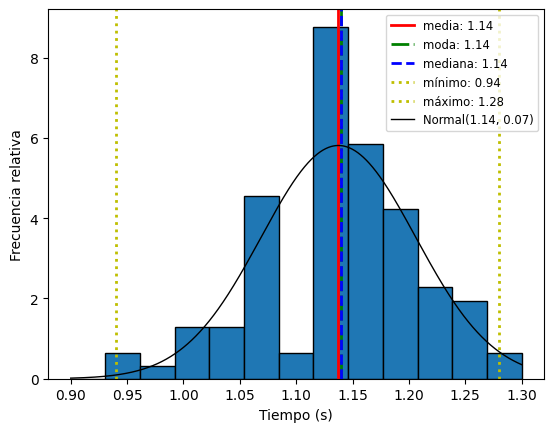

In [164]:
graficar(data_son_100,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott')

graficar(data_son_100,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_son_100,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott * 2',
         mult=2)

In [165]:
stats = obtener_estadisticas(data_son_100)
errorAbsolutoTotalSonoras = np.sqrt(0.01**2 + stats['errorEstandar']**2)

print("Error absoluto total:", errorAbsolutoTotalSonoras.round(4).item())

Error absoluto total: 0.0121


Comparamos mediociones visuales con sonoras:

In [166]:
print("Error absoluto: mediciones visuales vs sonoras")
print("Visuales:", errorAbsolutoTotalVisuales.round(4).item())
print("Sonoras:", errorAbsolutoTotalSonoras.round(4).item())
print("Diferencia:", np.abs(errorAbsolutoTotalVisuales - errorAbsolutoTotalSonoras).round(4).item())

Error absoluto: mediciones visuales vs sonoras
Visuales: 0.0182
Sonoras: 0.0121
Diferencia: 0.0061


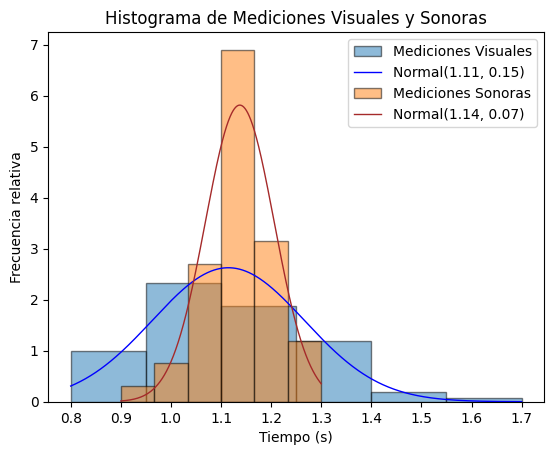

In [167]:
s = obtener_estadisticas(data_vis)
bin_width = 3.49 * s["desviacion"] / np.power(s["N"], 1/3)
bin_count = int(s["rango"] / bin_width)
# Calcular los limites de los bins redondeando al decimal mas cercano
bin_width = round(bin_width, 1)
bin_start = round(data_vis.min().item() - 0.5 * bin_width, 1)
bin_end = round(data_vis.max().item() + 0.5 * bin_width, 1)

# Posiciones de cada uno de los limites de los bins
bins = np.linspace(bin_start, bin_end, bin_count + 1)

plt.hist(data_vis['tiempo'], bins=bins, edgecolor='black', alpha=0.5, label='Mediciones Visuales', density=True)

# Agrego densidad normal
x = np.linspace(bin_start, bin_end, 1000)
y = (1 / (s["desviacion"] * np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.power((x - s["media"]) / s["desviacion"], 2))
plt.plot(x, y, color='blue', linewidth=1, label=f'Normal({s["media"]:.2f}, {s["desviacion"]:.2f})')

s = obtener_estadisticas(data_son)
bin_width = 3.49 * s["desviacion"] / np.power(s["N"], 1/3)
bin_count = int(s["rango"] / bin_width)
#bin_count = int(s["rango"] / bin_width)
#plt.hist(data_son['tiempo'], bins=bin_count, edgecolor='black', alpha=0.5, label='Mediciones Sonoras', density=True)
# Numero de bins

# Calcular los limites de los bins redondeando al decimal mas cercano
bin_width = round(bin_width, 1)
bin_start = round(data_son.min().item() - 0.5 * bin_width, 1)
bin_end = round(data_son.max().item() + 0.5 * bin_width, 1)

# Posiciones de cada uno de los limites de los bins
bins = np.linspace(bin_start, bin_end, bin_count + 1)
plt.hist(data_son['tiempo'], bins=bins, edgecolor='black', alpha=0.5, label='Mediciones Sonoras', density=True)

# Agrego densidad normal
x = np.linspace(bin_start, bin_end, 1000)
y = (1 / (s["desviacion"] * np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.power((x - s["media"]) / s["desviacion"], 2))
plt.plot(x, y, color='brown', linewidth=1, label=f'Normal({s["media"]:.2f}, {s["desviacion"]:.2f})')

plt.xticks(np.arange(0.8, 1.8, 0.1))

plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia relativa')
plt.title('Histograma de Mediciones Visuales y Sonoras')
plt.legend()
plt.show()